# Enhanced SVM-Based Active Learning for Banknote Authentication

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### (a) Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [7]:
column_names = ["variance","skew","curtosis","entropy","class"]

df = pd.read_csv('./Data/data_banknote_authentication.txt',header=None, names=column_names)
np.random.seed(0)
# Randomly select 472 indices for the test set
test_indices = np.random.choice(df.index, size=472, replace=False)
test_set = df.iloc[test_indices]
# Select the data points not in the test set for the training set
train_set = df.drop(test_indices)

### (b) Repeat each of the following two procedures 50 times. 

#### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until I use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. 

In [36]:
training_data = train_set.copy()  
test_data = test_set.copy()     
pool = []
test_errors = []

In [37]:
for i in range(1, 91):  # 90 iterations
    # Randomly sample 10 points without replacement
    sample = training_data.sample(10, replace=False)
    pool.extend(sample.index.tolist())

    # Update training_data by removing the sampled points
    training_data = training_data.drop(sample.index)
    
    # Prepare training samples
    X_train = train_set.loc[pool].drop('class', axis=1)  
    y_train = train_set.loc[pool]['class']  

    # Initialize SVM with L1 penalty
    svm = LinearSVC(penalty='l1', dual=False, random_state=0, max_iter=20000)

    # Set up GridSearchCV for penalty parameter selection with 5-fold CV
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Define a range of penalty parameters
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Use the best estimator
    best_svm = grid_search.best_estimator_

    # Prepare the entire test dataset
    X_test = test_data.drop('class', axis=1)             
    y_test = test_data['class']  

    # Calculate test error                      
    y_pred = best_svm.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(test_error)


/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/s

#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set 5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. I will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. I have implemented active learning.

In [29]:
from sklearn.metrics import accuracy_score

training_data = train_set.copy()  
test_data = test_set.copy()       
pool = []
test_errors_active = []

In [30]:
for i in range(1, 91):  # 90 iterations
    if i == 1:
        sample = training_data.sample(10, replace=False)
    else:
        distances = best_svm.decision_function(X_train_all)
        closest_points = np.argsort(np.abs(distances))[:10]
        sample = X_train_all.iloc[closest_points]

    pool.extend(sample.index.tolist())
    training_data = training_data.drop(sample.index)

    # Prepare training samples
    X_train = train_set.loc[pool].drop('class', axis=1)
    y_train = train_set.loc[pool]['class']
    X_train_all = training_data.drop('class', axis=1)

    # Initialize SVM with L1 penalty
    svm = LinearSVC(penalty='l1', dual=False, random_state=0, max_iter=30000)

    # Set up GridSearchCV for penalty parameter selection with 5-fold CV
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Use the best estimator
    best_svm = grid_search.best_estimator_

    # Calculate test error
    X_test = test_data.drop('class', axis=1)
    y_test = test_data['class']
    y_pred = best_svm.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors_active.append(test_error)


/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zoeyzhao/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Conv

### (c). Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, I are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report the conclusions. I obtained a learning curve by Monte-Carlo simulation.

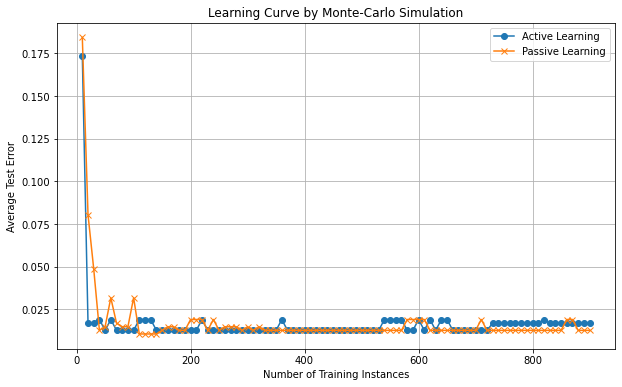

In [39]:
# Calculate average errors
average_active_errors = np.mean(test_errors_active, axis=0)
average_passive_errors = np.mean(test_errors, axis=0)

# Number of training instances
training_instances = list(range(10, 901, 10))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(training_instances, test_errors_active, label='Active Learning', marker='o')
plt.plot(training_instances, test_errors, label='Passive Learning', marker='x')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Learning Curve by Monte-Carlo Simulation')
plt.legend()
plt.grid(True)
plt.show()